In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('Maja/sport_demo_dataset.csv') # iF THINGS WORK OUT, CHANGE THE DIRECTORY
original = pd.read_stata('dati/td_ita.dta')

collapsed = pd.read_csv('Mattia/sport_activity_sessions_collapsed.csv')

In [10]:
#Do people who say "will participate in sports" then also respond saying they did sports? 
original

,pilot,id,date_not,datein_ques,datein_answ,first2w,week,YY_not,MM_not,DD_not,...,c6_17,c6_18,c6_19,c6_20,c6_21,c6_22,c6_23,c6_24,c6_25,c6_26
0,wenetItaly,0.0,2020-11-13 00:00:00,2020-11-13 00:00:00,2020-11-13 00:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,wenetItaly,0.0,2020-11-13 00:30:00,2020-11-13 00:30:00,2020-11-13 00:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,wenetItaly,0.0,2020-11-13 01:00:00,2020-11-13 01:00:00,2020-11-13 01:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wenetItaly,0.0,2020-11-13 01:30:00,2020-11-13 01:30:00,2020-11-13 01:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,wenetItaly,0.0,2020-11-13 02:00:00,2020-11-13 02:00:00,2020-11-13 02:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268469,wenetItaly,266.0,2020-12-11 19:00:00,2020-12-11 19:00:00,2020-12-11 21:38:15,Second two weeks,Friday,2020.0,12.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268470,wenetItaly,266.0,2020-12-11 20:00:00,2020-12-11 20:06:58,2020-12-11 21:38:24,Second two weeks,Friday,2020.0,12.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268471,wenetItaly,266.0,2020-12-11 21:00:00,2020-12-11 21:00:00,2020-12-11 21:38:37,Second two weeks,Friday,2020.0,12.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268472,wenetItaly,266.0,2020-12-11 22:00:00,2020-12-11 22:00:00,2020-12-12 00:14:37,Second two weeks,Friday,2020.0,12.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
collapsed

,Unnamed: 0,id,time_diff,start_time,end_time,duration
0,0,0.0,24,2020-11-19 10:00:00,2020-11-19 10:30:00,60.0
1,1,1.0,28,2020-11-20 19:00:00,2020-11-20 19:30:00,60.0
2,2,1.0,29,2020-11-21 18:00:00,2020-11-21 18:00:00,30.0
3,3,1.0,44,2020-11-24 18:00:00,2020-11-24 18:00:00,30.0
4,4,2.0,25,2020-11-19 17:00:00,2020-11-19 17:00:00,30.0
...,...,...,...,...,...,...
610,610,262.0,38,2020-11-23 09:00:00,2020-11-23 09:00:00,30.0
611,611,262.0,59,2020-11-29 19:30:00,2020-11-29 20:00:00,60.0
612,612,265.0,16,2020-11-17 11:00:00,2020-11-17 11:00:00,30.0
613,613,265.0,33,2020-11-22 16:00:00,2020-11-22 17:30:00,120.0


In [24]:
len(df.id.unique())

129

In [23]:
len(collapsed.id.unique())

128

,day_of_week,start_time
0,3,2020-11-19 10:00:00
1,4,2020-11-20 19:00:00
2,5,2020-11-21 18:00:00
3,1,2020-11-24 18:00:00
4,3,2020-11-19 17:00:00
...,...,...
610,0,2020-11-23 09:00:00
611,6,2020-11-29 19:30:00
612,1,2020-11-17 11:00:00
613,6,2020-11-22 16:00:00


In [118]:
out = collapsed_sessions.groupby(['hour', 'day_of_week'])['duration'].mean().unstack()
custom_hours = ['5', '6', '7', '8', '9', '10', '11', '12', '1', '2', '3', '4', '4.30']
dummy =  pd.concat([out.loc[5:], out.loc[:5]], ignore_index=True)

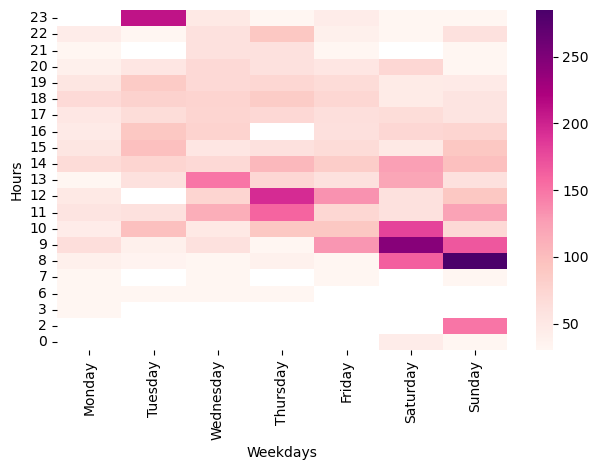

In [127]:
x_axis_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pal = sns.color_palette("RdPu", 250)
sns.heatmap(out, xticklabels=x_axis_labels, cmap=pal).set(xlabel='Weekdays', ylabel='Hours')


plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('heatmap_sport_total_distribution.png')
plt.show()